In [ ]:
from main import polygonize
import numpy as np

def get_directions(vecs):
    '''
    Returns two or three vectors specifying the direction in which each molecule should be aligned
    in the cyclical TS, pointing towards the center of the polygon.
    '''
    assert len(vecs) in (2,3)
    if len(vecs) == 2:
        return np.array([[0,1,0],
                            [0,-1,0]])
    else:
        a = vecs[0,1,0] # first vec, end, x
        b = vecs[1,1,0] # second vec, end, x
        c = vecs[1,1,1] # second vec, end, y

        x = a/2
        y = (b**2 + c**2 - a*b)/(2*c)
        cc = np.array([x,y,0])
        # coordinates of the triangle circocenter

        v1 = cc - np.mean((vecs[0,1],vecs[2,1]), axis=0)
        v2 = cc - np.mean((vecs[1,1],vecs[0,1]), axis=0)
        v3 = cc - np.mean((vecs[2,1],vecs[1,1]), axis=0)
        # versors connecting center of side with circocenter

        return np.vstack((v1,v2,v3))

# get_directions(polygonize([1,1,1])[0])
# polygonize([1,1,1])[0]

from linalg_tools import cartesian_product
rotation_steps = 2
a = cartesian_product(*[range(-rotation_steps, rotation_steps+1) for _ in range(3)])*45/rotation_steps
a[0:10]

In [ ]:
x = np.array([[[0.,         0. ,        0.        ],
  [1.97332738, 0.   ,      0.        ]],

 [[2.83868969, 4.15092487, 0.        ],
  [1.97332738, 0.        , 0.        ]],

 [[2.83868969, 4.15092487, 0.        ],
  [0.        , 0.        , 0.        ]]])

[np.linalg.norm(i[0]-i[1]) for i in x]

## Dataclass

In [30]:
from main import Options
options = Options()
dir(options)
{var:options.__getattribute__(var) for var in dir(options) if var[0:2] != '__'}

{'bypass': False,
 'checkpoint': False,
 'optimization': True,
 'pruning_thresh': 0.5,
 'rotation_steps': 6}

## Options with numbers

In [31]:
keywords_list = ['STEPS=5']
line = 'NOOPT STEPS=7 BYPASS'
keywords = [l.split('=')[0] for l in line.split()]
keywords

['NOOPT', 'STEPS', 'BYPASS']

## options with commas/equals

In [21]:
d = {0:[[1,'a']], 1:[[9,'a']]}
def _set_custom_orbs(orb_string):
    '''
    orb_string looks like 'a=2.345,b=3.456,c=2.22'

    '''
    pairs = [(piece.split('=')[0], float(piece.split('=')[1])) for piece in orb_string.split(',')]

    for letter, dist in pairs:
        for index in range(len(self.objects)):
            for pairing in self.pairing_dict[index]:

    # for each pairing specified by the user, check each pairing recorded
    # in the pairing_dict on that molecule.

                if pairing[1] == letter:
                    for reactive_atom, reactive_index in zip(self.objects[index].reactive_atoms_classes, self.objects[index].reactive_indexes):
                        if reactive_index == pairing[0]:
                            reactive_atom.init(self.objects[index], reactive_index, update=True, orb_dim=dist/2)

                # If the letter matches, look for the correct reactive atom on that molecule. When we find the correct match,
                # set the new orbital center with imposed distance from the reactive atom. The imposed distance is half the 
                # user-specified one, as the final atomic distances will be given by two halves of this length.


# _set_custom_orbs('a=2.345,b=3.456')
# d = {0:[[1,'a']], 1:[[9,'a']]}

'CLASHES(a=3.5)'[8:-1]

'a=3.5'

## SUPRAFAC Keyword

In [6]:
l = [0,2,3,1]

for n in l:
    keep = [i for i in l if n >= i]
    if len(keep) == 2:
        b = [i in keep for i in l]
        print(keep)
        print(n)
        print(b)

[0, 1]
1
[True, False, False, True]


## Rodrigues Formula

In [2]:
import numpy as np
from linalg_tools import norm, rot_mat_from_pointer
def rodrigues(pivot, angle):
    '''
    Pivot is a shape (3,) array
    Angle in degrees
    '''

    p = norm(pivot)
    a = angle/180*np.pi
    x = np.array([1,0,0])
    y = np.array([0,1,0])
    z = np.array([0,0,1])

    v0 = x*np.cos(a) + np.cross(p, x) * np.sin(a) + p*(np.dot(p, x))*(1-np.cos(a))
    v1 = y*np.cos(a) + np.cross(p, y) * np.sin(a) + p*(np.dot(p, y))*(1-np.cos(a))
    v2 = z*np.cos(a) + np.cross(p, z) * np.sin(a) + p*(np.dot(p, z))*(1-np.cos(a))

    v0 = v0[..., None]
    v1 = v1[..., None]
    v2 = v2[..., None]

    return np.hstack((v0,v1,v2))
pivot = np.array([1,0,0])

In [2]:
%timeit -r 100 rodrigues(pivot, 180)

349 µs ± 75 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [3]:
%timeit -r 100 rot_mat_from_pointer(pivot, 180)

96.3 µs ± 1.57 µs per loop (mean ± std. dev. of 100 runs, 10000 loops each)


In [30]:
print(rodrigues(pivot, 55))
print(rot_mat_from_pointer(pivot, 55))

[[ 1.          0.          0.        ]
 [ 0.          0.57357644 -0.81915204]
 [ 0.          0.81915204  0.57357644]]
[[ 1.          0.          0.        ]
 [ 0.          0.57357644 -0.81915204]
 [ 0.          0.81915204  0.57357644]]


## Align vectors

In [9]:
from scipy.spatial.transform import Rotation as R
v1 = np.array((1,0,0))
v2 = np.array((0,1,0))
R.align_vectors((v1,v2),(v1,-v2))[0].as_matrix()

array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0., -1.]])

## RMSD threshold
Looking for the best RMSD treshold for optimized structures obtainment

Text(0.5, 0, 'RMSD')

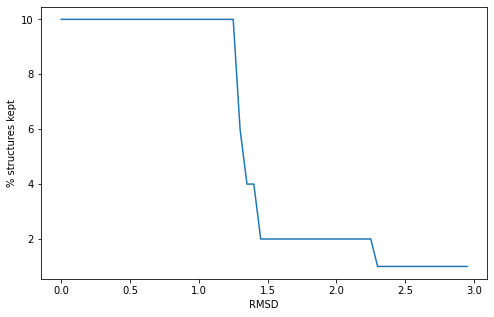

In [24]:
from prune import prune_conformers
import numpy as np
import matplotlib.pyplot as plt
import os
from cclib.io import ccread
os.chdir('Resources/RMSD_test')

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'% structures kept')
plt.xlabel('RMSD')

for filename in os.listdir():
    if filename[-4:] == '.xyz':
        data = ccread(filename)
        x, y = [], []
        for RMSD in np.arange(0.5,3,0.05):
            mask = prune_conformers(data.atomcoords, data.atomnos, max_rmsd=RMSD)[1]
            kept = len([m for m in mask if m == True])/len(mask)
            # s = f'kept {len([m for m in mask if m == True])}/{len(mask)}'
            y.append(kept)
            x.append(RMSD)
        plt.plot(x, y, label=filename)
plt.legend()